1.	Предварительная обработка датасета.
2.	Применение минимум 3-х алгоритмов машинного обучения (включая обязательно использование искусственных нейронных сетей) в Jupyter Notebook (или colab) позволяющих решить поставленную задачу анализа данных, выбрать лучшую модель и применить ее в приложении.
3.	Создание локального репозитория git.
4.	Реализация приложения. Приложение может быть консольное, оконное или веб-приложение по выбору.
5.	Создание профиля на github.com 
6.	Выгрузка коммитов приложения из локального репозитория на github.com.

In [24]:
# Поиск наиболее точного алгоритма машинного обучения
# используем LinearRegression(), RandomForestRegressor, KNeighborsRegressor, SVR
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from pandas import read_csv, DataFrame
import array 

path_to_data  = r"C:/bauman/git_bauman/data/ebw_data.csv"

dataset = pd.read_csv(path_to_data)
dataset.head()
dataset.describe()

# посмотрели есть ли выпадения данных
print('percentage of NaN cells:')
print(dataset.isna().sum() / dataset.shape[0] *100)

#смотрим корреляцию между столбцами
dataset.corr()
#особенное какой-то корреляции не видно, максимальная между VW и Width = -0,87 и VW и Depth = -0,67
# попробуем разные методы 

# нормализация и запоминание мин и макс по столбцам
# для регрессси не нужно, но нужно для ИНС. Сделаем для общего подхода к решению
maxdataset = dataset[['IW','IF','VW','FP','Depth','Width']].max()
mindataset = dataset[['IW','IF','VW','FP','Depth','Width']].min()

maxIW = maxdataset['IW'] 
minIW = mindataset['IW'] 
normIW = (dataset['IW'] - minIW ) / (maxIW - minIW )

maxIF = maxdataset['IF'] 
minIF = mindataset['IF'] 
normIF = (dataset['IF'] - minIF ) / (maxIF - minIF )

maxVW = maxdataset['VW'] 
minVW = mindataset['VW'] 
normVW = (dataset['VW'] - minVW ) / (maxVW - minVW )

maxFP = maxdataset['FP'] 
minFP = mindataset['FP'] 
normFP = (dataset['FP'] - minFP ) / (maxFP - minFP )

maxDepth = maxdataset['Depth'] 
minDepth = mindataset['Depth'] 
normDepth = (dataset['Depth'] - minDepth ) / (maxDepth - minDepth )

maxWidth = maxdataset['Width'] 
minWidth = mindataset['Width'] 
normWith = (dataset['Width'] - minWidth ) / (maxWidth - minWidth )

# сохраним для случая использования модели отдельно от программы обучения
minmax = pd.DataFrame({'maxDepth': maxDepth,
                       'minDepth': minDepth,
                       'minWidth': minWidth,
                       'maxWidth': maxWidth,
                       'minIW': minIW,
                       'maxIW': maxIW,
                       'minIF': minIF,
                       'maxIF': maxIF,
                       'minVW': minVW,
                       'maxVW': maxVW,
                       'minFP': minFP,
                       'maxFP': maxFP,
                        }, index=[0])
minmax.to_csv(path_to_model + r'/minmax.csv')

#собираем dataset для обучения
normdataset = pd.DataFrame({'IW': normIW, 
                            'IF': normIF,
                            'VW': normVW,
                            'FP': normFP,
                            'Depth': normDepth,
                            'Width': normWith,
                            })

# переменные для входных и выходных данных
X = normdataset[['IW','IF','VW','FP']]
Y = normdataset[['Depth','Width']] 

# делим выборку и перемешиваем
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1, shuffle = True)


# создаем набор моделей
models_set = [LinearRegression(),  
	          RandomForestRegressor(n_estimators=50, max_features ='sqrt'), 
	          KNeighborsRegressor(n_neighbors=6),  
	          SVR(kernel='linear')]

 
TestModels = DataFrame()
tmp = {}

currR2 = array.array('f',[0.0,0.0])

for model in models_set:
   
    m = str(model)
    tmp['Model'] = m[:m.index('(')]    
   
    for i in  range(Y_train.shape[1]):
        model.fit(X_train.values, Y_train.iloc[:,i].values) 
     
        r2 = r2_score(Y_test.iloc[:,i].values, model.predict(X_test.values))
        
        tmp['R2_Y%s'%str(i+1)] = r2
        print(i,"  -> ",m," :  F(IW,IF,VW,FP) vs ",Y_train.columns[i]," R2_Y" ,r2)

    TestModels  = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)

#по результатам тестирования моделей:
#R2 не стабилен, возможно слишком сильное влияние разбиения на тренеровочную и тестовую части
#R2 менялся от 0,32 до 0,97
#Регрессия может быть использована для предсказания параметров шва

TestModels

percentage of NaN cells:
IW       0.0
IF       0.0
VW       0.0
FP       0.0
Depth    0.0
Width    0.0
dtype: float64
0   ->  LinearRegression()  :  F(IW,IF,VW,FP) vs  Depth  R2_Y 0.7549659286738231
1   ->  LinearRegression()  :  F(IW,IF,VW,FP) vs  Width  R2_Y 0.944855813827862
0   ->  RandomForestRegressor(max_features='sqrt', n_estimators=50)  :  F(IW,IF,VW,FP) vs  Depth  R2_Y 0.771902360407646
1   ->  RandomForestRegressor(max_features='sqrt', n_estimators=50)  :  F(IW,IF,VW,FP) vs  Width  R2_Y 0.9872696110431985
0   ->  KNeighborsRegressor(n_neighbors=6)  :  F(IW,IF,VW,FP) vs  Depth  R2_Y 0.6734055124397177
1   ->  KNeighborsRegressor(n_neighbors=6)  :  F(IW,IF,VW,FP) vs  Width  R2_Y 0.975798265042451
0   ->  SVR(kernel='linear')  :  F(IW,IF,VW,FP) vs  Depth  R2_Y 0.7608315704748919
1   ->  SVR(kernel='linear')  :  F(IW,IF,VW,FP) vs  Width  R2_Y 0.9434019237177256


C:\Users\HeroPC\AppData\Local\Temp\ipykernel_23104\2127517503.py:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels  = TestModels.append([tmp])
C:\Users\HeroPC\AppData\Local\Temp\ipykernel_23104\2127517503.py:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels  = TestModels.append([tmp])
C:\Users\HeroPC\AppData\Local\Temp\ipykernel_23104\2127517503.py:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels  = TestModels.append([tmp])
C:\Users\HeroPC\AppData\Local\Temp\ipykernel_23104\2127517503.py:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels  = TestModels.append([tmp])


,R2_Y1,R2_Y2
Model,,
LinearRegression,0.754966,0.944856
RandomForestRegressor,0.771902,0.987270
KNeighborsRegressor,0.673406,0.975798
SVR,0.760832,0.943402


percentage of NaN cells:
IW       0.0
IF       0.0
VW       0.0
FP       0.0
Depth    0.0
Width    0.0
dtype: float64
Epoch 1/1000
3/3 [==============================] - 0s 52ms/step - loss: 0.1642 - accuracy: 0.6912 - val_loss: 0.1630 - val_accuracy: 0.6912
Epoch 2/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.1627 - accuracy: 0.6912 - val_loss: 0.1614 - val_accuracy: 0.6912
Epoch 3/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.1611 - accuracy: 0.6912 - val_loss: 0.1599 - val_accuracy: 0.6912
Epoch 4/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.1596 - accuracy: 0.6912 - val_loss: 0.1585 - val_accuracy: 0.6912
Epoch 5/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.1582 - accuracy: 0.6912 - val_loss: 0.1570 - val_accuracy: 0.6912
Epoch 6/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.1567 - accuracy: 0.6912 - val_loss: 0.1555 - val_accuracy: 0.6912
Epoch 7/1000
3/3 [==================

Text(0, 0.5, 'mse')

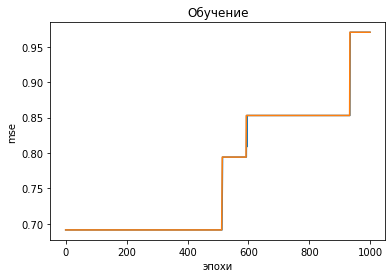

In [25]:
# Обучение модели ИНС

from pandas import read_csv, DataFrame
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 
import matplotlib.pyplot as plt

path_to_model = r'C:/bauman/git_bauman/ebw_model'
path_to_data  = r"C:/bauman/git_bauman/data/ebw_data.csv"

dataset = pd.read_csv(path_to_data)
#dataset.head()
#dataset.describe()

# посмотрели есть ли выпадения данных
print('percentage of NaN cells:')
print(dataset.isna().sum() / dataset.shape[0] *100)


# нормализация и запоминание мин и макс по столбцам
maxdataset = dataset[['IW','IF','VW','FP','Depth','Width']].max()
mindataset = dataset[['IW','IF','VW','FP','Depth','Width']].min()

maxIW = maxdataset['IW'] 
minIW = mindataset['IW'] 
normIW = (dataset['IW'] - minIW ) / (maxIW - minIW )

maxIF = maxdataset['IF'] 
minIF = mindataset['IF'] 
normIF = (dataset['IF'] - minIF ) / (maxIF - minIF )

maxVW = maxdataset['VW'] 
minVW = mindataset['VW'] 
normVW = (dataset['VW'] - minVW ) / (maxVW - minVW )

maxFP = maxdataset['FP'] 
minFP = mindataset['FP'] 
normFP = (dataset['FP'] - minFP ) / (maxFP - minFP )

maxDepth = maxdataset['Depth'] 
minDepth = mindataset['Depth'] 
normDepth = (dataset['Depth'] - minDepth ) / (maxDepth - minDepth )

maxWidth = maxdataset['Width'] 
minWidth = mindataset['Width'] 
normWith = (dataset['Width'] - minWidth ) / (maxWidth - minWidth )

minmax = pd.DataFrame({'maxDepth': maxDepth,
                       'minDepth': minDepth,
                       'minWidth': minWidth,
                       'maxWidth': maxWidth,
                       'minIW': minIW,
                       'maxIW': maxIW,
                       'minIF': minIF,
                       'maxIF': maxIF,
                       'minVW': minVW,
                       'maxVW': maxVW,
                       'minFP': minFP,
                       'maxFP': maxFP,
                        }, index=[0])
minmax.to_csv(path_to_model + r'/minmax.csv')

normdataset = pd.DataFrame({'IW': normIW, 
                            'IF': normIF,
                            'VW': normVW,
                            'FP': normFP,
                            'Depth': normDepth,
                            'Width': normWith,
                            })

# переменные для входных и выходных данных
X = normdataset[['IW','IF','VW','FP']]
Y = normdataset[['Depth','Width']] 

# делим выборку и перемешиваем
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.05, shuffle = True)

# создаем модель
model = Sequential()
model.add(Dense(4, activation = 'sigmoid'))
model.add(Dense(2, activation = 'sigmoid'))
model.compile( loss = 'mse',optimizer = 'adam', metrics = ['accuracy'] )

history = model.fit(X_train,Y_train, epochs = 1000, validation_data = (X_train,Y_train), verbose = 1)

model.save(path_to_model)

# для инфомации выводим кривую обучения
plt.plot(history.history['accuracy'],label = 'Обучающая выборка')
plt.plot(history.history['val_accuracy'],label = 'Точность тест')
plt.title('Обучение')
plt.xlabel('эпохи')
plt.ylabel(model.loss)

In [26]:
# coding: windows-1251
# код отвечающий за предсказание с использованием ИНС, будет использован в консольном приложении

import keras
import pandas as pd

# путь до сохраненной модели
path_to_model = r'C:/bauman/git_bauman/ebw_model'

minmax = pd.read_csv(path_to_model + r'/minmax.csv')

print("Введите параметр IW (сварочный ток), значение между [%3.1f,%3.1f]" % (minmax.minIW,minmax.maxIW))
IW_human_input = input()
if IW_human_input=='':
    IW_human_input = (minmax.minIW+minmax.maxIW)/2
else:
    IW_human_input = float(IW_human_input)
    
print("Введите параметр IF (ток фокусировки эл. пучка), значение между [%3.1f,%3.1f]" % (minmax.minIF,minmax.maxIF))
IF_human_input = input()
if IF_human_input=='':
    IF_human_input = (minmax.minIF+minmax.maxIF)/2
else:
    IF_human_input = float(IF_human_input)


print("Введите параметр VW (скорость сварки), значение между [%3.1f,%3.1f]" % (minmax.minVW,minmax.maxVW))
VW_human_input = input()
if VW_human_input=='':
    VW_human_input = (minmax.minVW+minmax.maxVW)/2
else:
    VW_human_input = float(VW_human_input)

print("Введите параметр FP (расстояние до образца), значение между  [%3.1f,%3.1f]" % (minmax.minFP,minmax.maxFP))
FP_human_input = input()
if FP_human_input=='':
    FP_human_input = (minmax.minFP+minmax.maxFP)/2
else:
    FP_human_input = float(FP_human_input)

    
human_input = pd.DataFrame({'IW': [IW_human_input],
                            'IF': [IF_human_input],
                            'VW': [VW_human_input],
                            'FP': [FP_human_input]})

human_input['IW'] = (human_input['IW'] - minmax.minIW) / (minmax.maxIW - minmax.minIW)
human_input['IF'] = (human_input['IF'] - minmax.minIF) / (minmax.maxIF - minmax.minIF)
human_input['VW'] = (human_input['VW'] - minmax.minVW) / (minmax.maxVW - minmax.minVW)
human_input['FP'] = (human_input['FP'] - minmax.minFP) / (minmax.maxFP - minmax.minFP)

model= keras.models.load_model(path_to_model)

mypredcit = model.predict(human_input)
Depth = mypredcit[:,0]*(minmax.maxDepth-minmax.minDepth)+minmax.minDepth
Width = mypredcit[:,1]*(minmax.maxWidth-minmax.minWidth)+minmax.minWidth

predict = pd.DataFrame({'Depth': Depth, 
                        'Width': Width})

print("F(IW,IF,Vw,FP) = (Depth, Width)")
print("F(%3.1f,%3.1f,%3.1f,%3.1f) = (%3.4f,%3.4f)"%(IW_human_input,IF_human_input,VW_human_input,FP_human_input,Depth,Width))

#print(predict)

Введите параметр IW (сварочный ток), значение между [43.0,49.0]
Введите параметр IF (ток фокусировки эл. пучка), значение между [131.0,150.0]
Введите параметр VW (скорость сварки), значение между [4.5,12.0]
Введите параметр FP (расстояние до образца), значение между  [50.0,125.0]
1/1 [==============================] - 0s 33ms/step
F(IW,IF,Vw,FP) = (Depth, Width)
F(12.0,40.0,40.0,100.0) = (1.0317,1.8048)
